<a href="https://colab.research.google.com/github/yox19/MNE-Python/blob/main/MNE_Python_Motor_Movement_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1 - Install & Load Library

In [1]:
# Install python packages
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 54.9 MB/s eta 0:00:00


In [2]:
#Import Lib
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf
import numpy as np

STEP 2 - Choose subject and task Runs

In [3]:
# Load dataset from PhysioNet using MNE's built-in function
# download the data for left hand vs right hand motor imagery.
subject = [1, 2]
runs = [3,4,7,8,11,12]
raw_fnames = mne.datasets.eegbci.load_data(subject, runs)
print(f"Downloaded files: {raw_fnames}")

Using default location ~/mne_data for EEGBCI...
Creating /root/mne_data


Do you want to set the path:
    /root/mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Could not read the /root/.mne/mne-python.json json file during the writing. Assuming it is empty. Got: Expecting value: line 1 column 1 (char 0)
Download complete in 01m33s (29.5 MB)
Downloaded files: [PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R08.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R12.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R03.edf'), PosixPath('/root/

In [4]:
print(raw_fnames)

# Load the first raw file from the list to access its info attribute
raw = mne.io.read_raw_edf(raw_fnames[0], preload=False)
print(raw.info)

[PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R08.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R12.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R03.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R04.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R07.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R08.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R11.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R12.edf')]
Ext

STEP 3 - Load and Combine data

In [5]:
raw_fnames = eegbci.load_data(subject, runs)
raw = mne.io.read_raw_edf(raw_fnames[0], preload=True)
for fname in raw_fnames[1:]:
    raw.append(mne.io.read_raw_edf(fname, preload=True))

# Rename channels to remove trailing dots to match standard montage
new_names = [ch.replace('.', '') if ch.endswith('.') else ch for ch in raw.info['ch_names']]
raw.rename_channels(dict(zip(raw.info['ch_names'], new_names)))

# Set a standard montage for plotting electrode locations
raw.set_montage('standard_1020', on_missing='ignore')

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R08.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf...
S

<RawEDF | S001R03.edf, 64 x 238080 (1488.0 s), ~116.3 MiB, data loaded>

STEP 4 - Visualize raw data

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


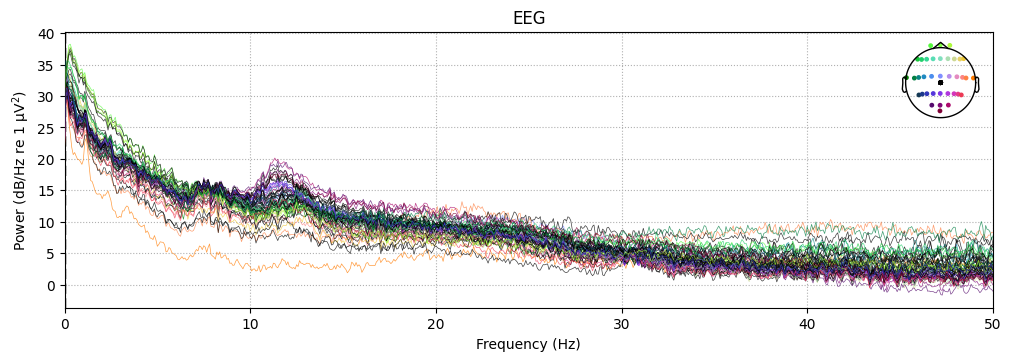

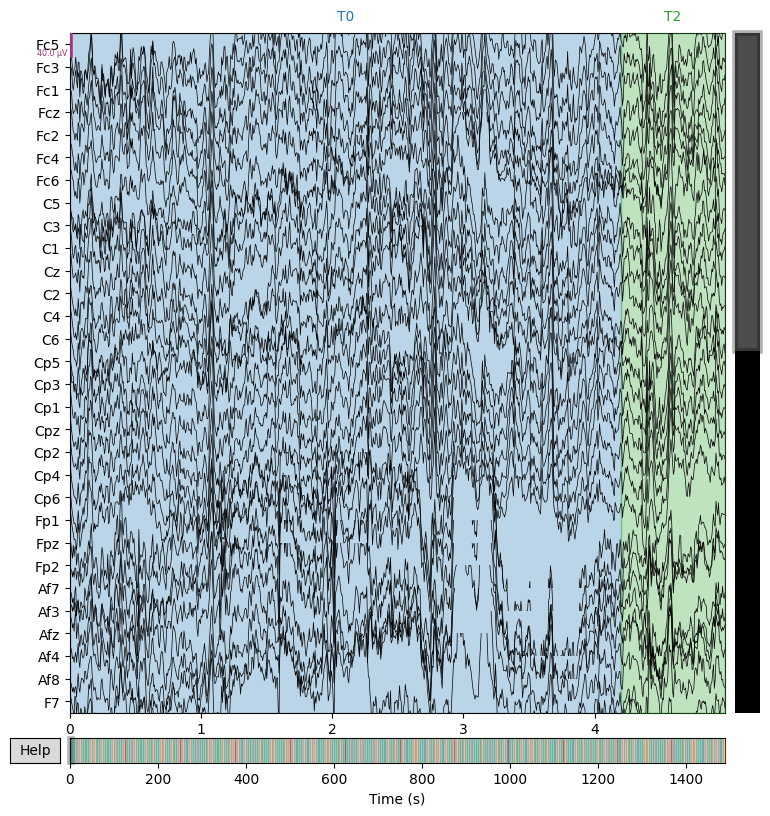

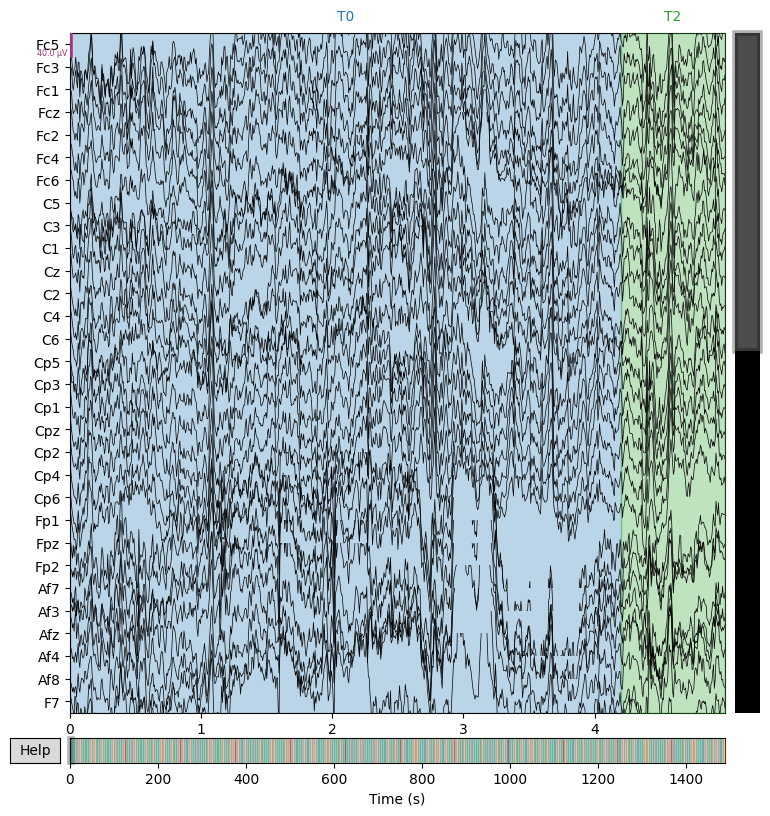

In [6]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(duration=5, n_channels=30)

STEP 5 - Preprocess and Filter

In [7]:
# look for low-frew drifits and high-freq noise
raw.filter(7., 30., fir_design='firwin')

Filtering raw data in 12 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



<RawEDF | S001R03.edf, 64 x 238080 (1488.0 s), ~116.3 MiB, data loaded>

STEP 6 - Visualize Raw EEG

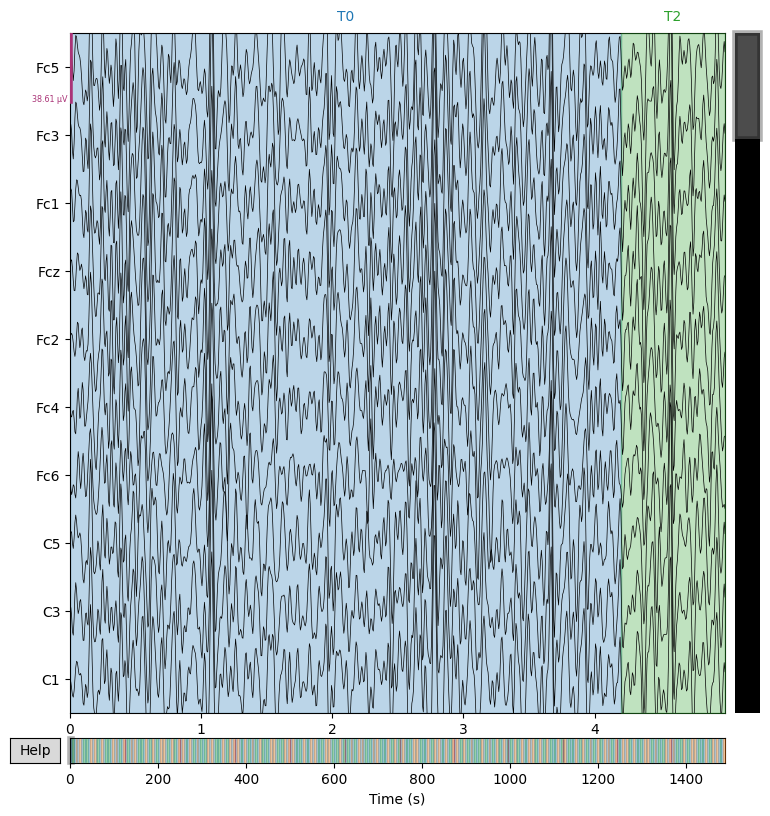

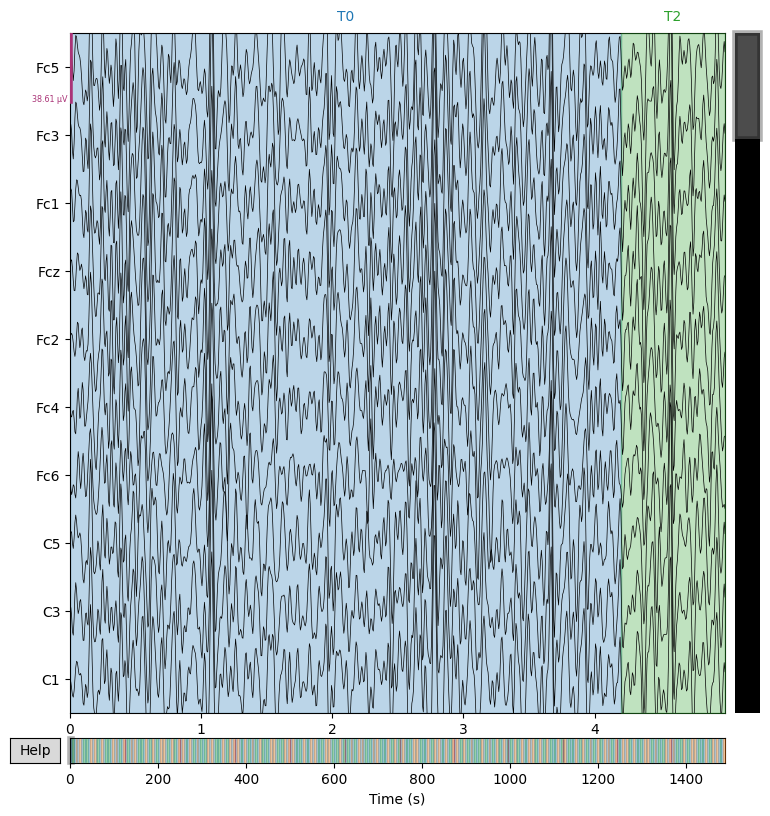

In [8]:
raw.plot(n_channels=10, duration=5, scalings='auto')

STEP 7 - extract Events (Motor Imagery Tasks)

In [9]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


In [10]:
# Event dictionary setup
# T1 corresponds to Left hand motor imagery, T2 to Right hand motor imagery
event_id = {
    "left_hand": 2,  # T1
    "right_hand": 3,  # T2
}


STEP 8 - Epoch (segment) data around each event

In [13]:
# Set rejection criteria for noisy epochs
reject_criteria = dict(eeg=200e-6)  # 200 µV peak-to-peak for EEG

In [14]:
epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id,
    tmin=-1.0,
    tmax=4.0,
    reject=reject_criteria,
    preload=True,
    baseline=None,
)

Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 180 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'Po7', 'O1', 'Iz']
    Rejecting  epoch based on EEG : ['Af7', 'P7', 'O1', 'Oz', 'Iz']
    Rejecting  epoch based on EEG : ['Fp1', 'Iz']
    Rejecting  epoch based on EEG : ['Fp1', 'Af7', 'Af3', 'O1', 'Iz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Af4', 'Af8', 'O1', 'Oz', 'O2', 'Iz']
    Rejecting  epoch based on EEG : ['O1', 'Iz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Af7', 'Af3', 'Po7', 'O1', 'Oz', 'O2', 'Iz']
    Rejecting  epoch based on EEG : ['Af7', 'Af3', 'F7', 'P7', 'Po7', 'Po3', 'O1', 'Oz', 'O2', 'Iz']
    Rejecting  epoch based on EEG : ['Af7', 'Po4', 'Po8', 'O1', 'O2', 'Iz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'Iz']
    Rejecting  epoch based on EEG : ['Iz']
    Rejecting  epoch based o

Inspect dropped epochs

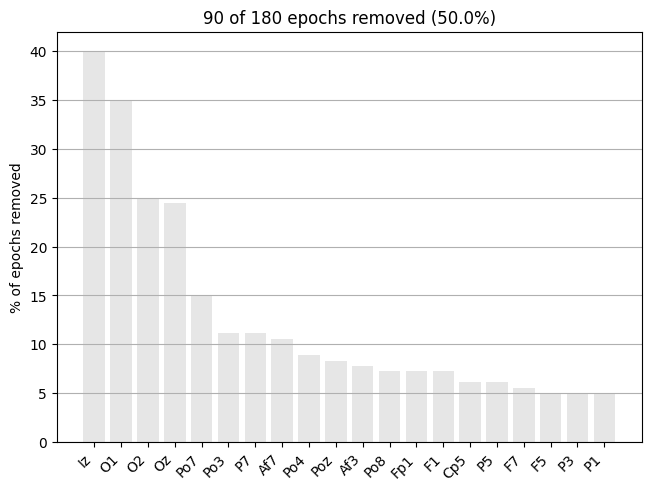

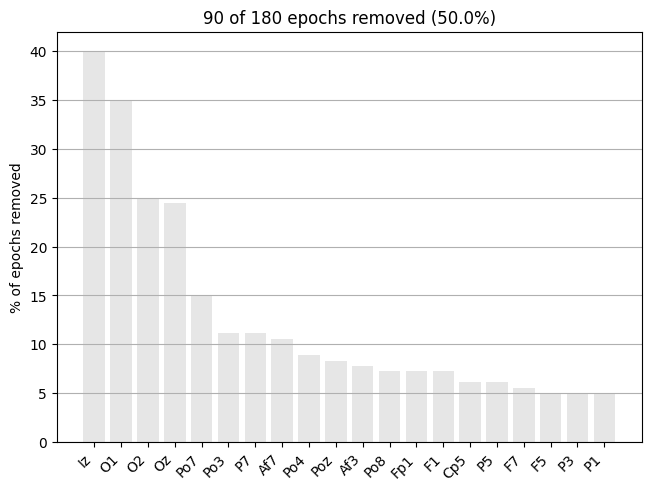

In [15]:
epochs.plot_drop_log()

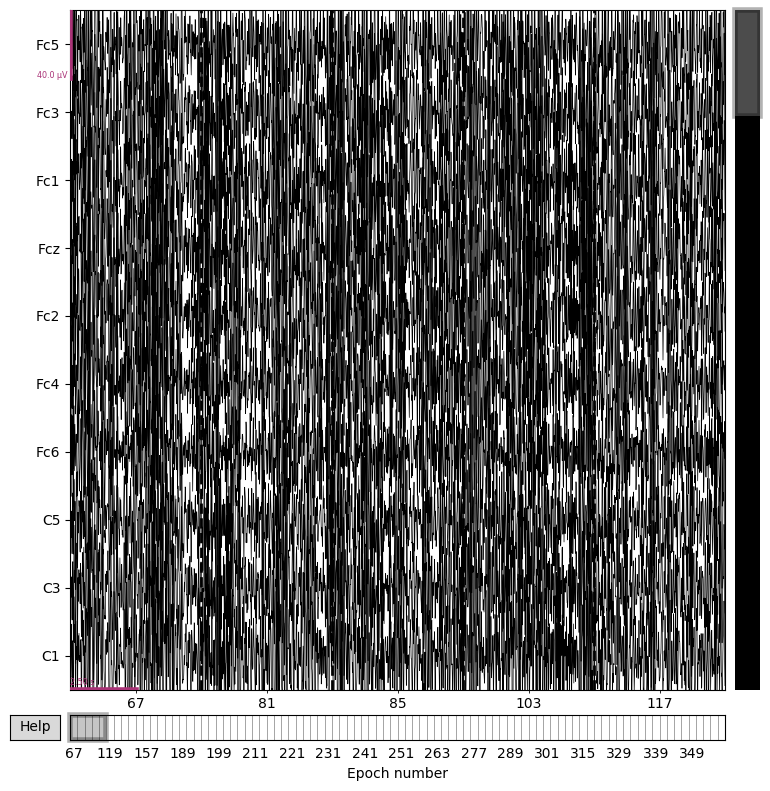

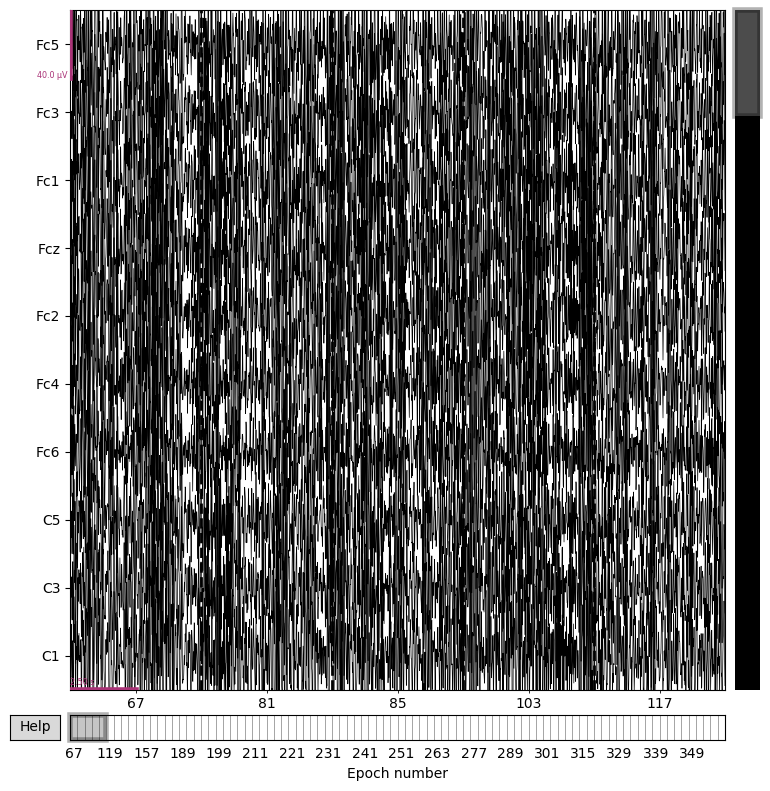

In [16]:
# plot epochs
epochs.plot(n_epochs=5, n_channels=10)

In [17]:
# selection of specific events in each epochs
epochs_left_hand = epochs['left_hand']
print(f"Number of left hand epochs: {len(epochs_left_hand)}")
epochs_right_hand = epochs['right_hand']
print(f"Number of right hand epochs: {len(epochs_right_hand)}")

Number of left hand epochs: 48
Number of right hand epochs: 42


In [18]:
epochs_both_hands = epochs[['left_hand', 'right_hand']]
print(f"Number of epochs for both hands: {len(epochs_both_hands)}")

Number of epochs for both hands: 90


STEP 9 - Compute Power spectral Density (PSD)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


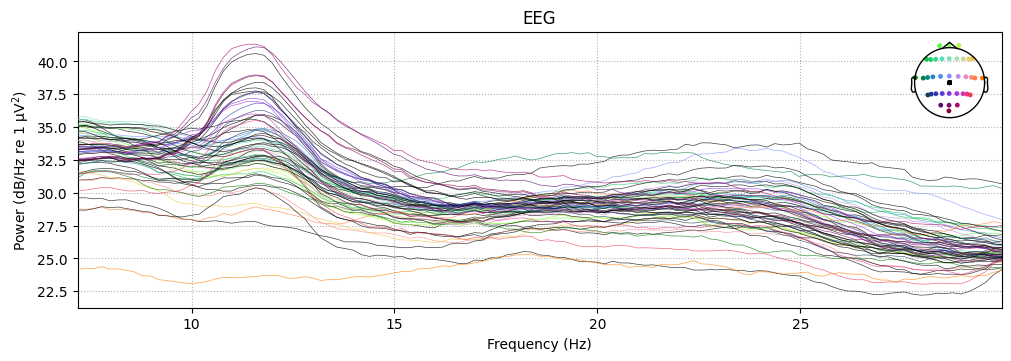

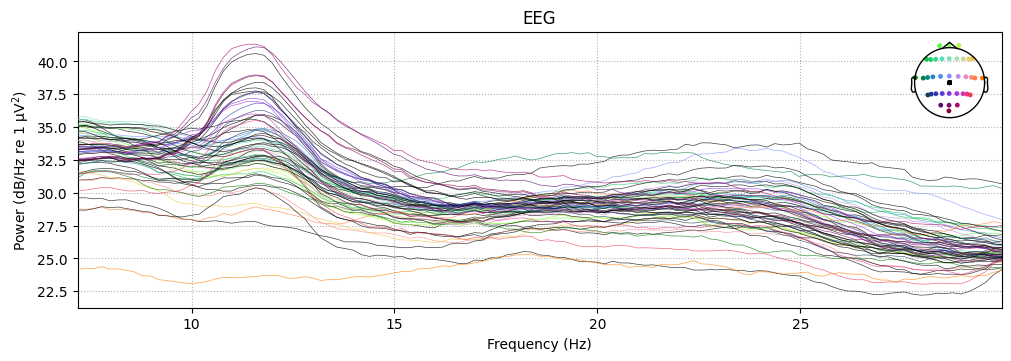

In [19]:
epochs.plot_psd(fmin=7, fmax=30)

STEP 10 - Compare Left vs Right Hand Imagery

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


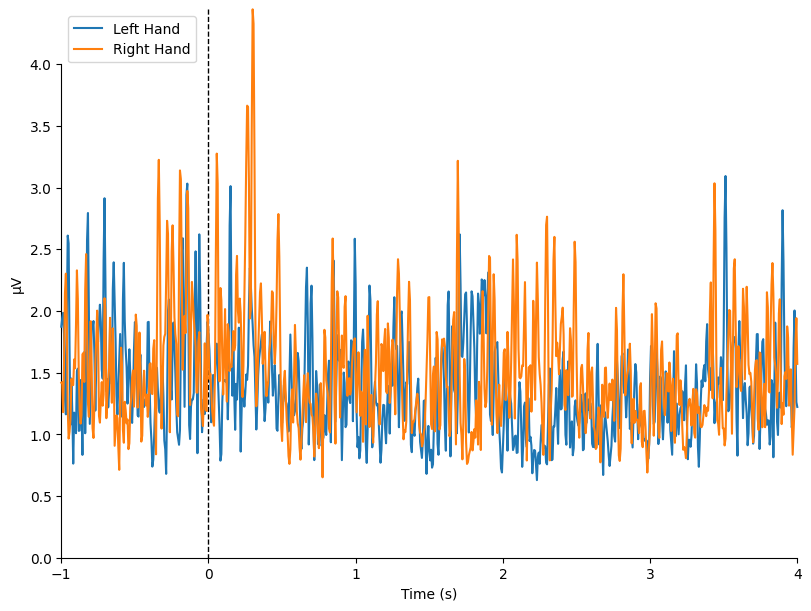

[<Figure size 800x600 with 1 Axes>]

In [20]:
left = epochs['left_hand'].average()
right = epochs['right_hand'].average()
mne.viz.plot_compare_evokeds({'Left Hand': left, 'Right Hand': right })

STEP 11 - Time frequency analysis

Applying baseline correction (mode: logratio)


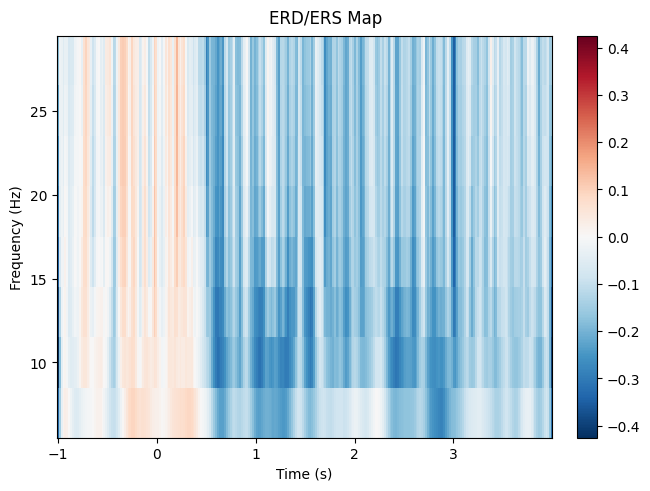

[<Figure size 640x480 with 2 Axes>]

In [21]:
# Event related desynchronization (ERD/ERS)
frequencies = np.arange(7, 30, 3)
power = epochs.compute_tfr(
    "morlet", n_cycles=2, return_itc=False, freqs=frequencies, decim=3, average=True
)
power.plot(picks='C3', baseline=(-1,0), mode='logratio', title='ERD/ERS Map')

STEP 12-Topgraphic (Scalp) Maps

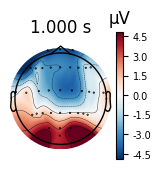

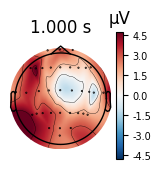

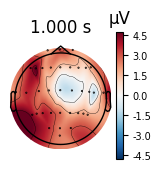

In [22]:
# Load a standard electrode montage (10-20 system)
montage = mne.channels.make_standard_montage('standard_1020')

# Rename channels in evoked objects to remove trailing dots
# (Assumes 'new_names' from A0-ocuE9T_2y contains the cleaned names)
left.rename_channels(dict(zip(left.info['ch_names'], [ch.replace('.', '') if ch.endswith('.') else ch for ch in left.info['ch_names']] )))
right.rename_channels(dict(zip(right.info['ch_names'], [ch.replace('.', '') if ch.endswith('.') else ch for ch in right.info['ch_names']] )))

# Apply montage to your data, ignoring channels not found in the montage
left.set_montage(montage, on_missing='ignore')
right.set_montage(montage, on_missing='ignore')

# List of channels causing overlap issues for topomap generation (from the error message)
overlapping_channels = [
    'Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C5', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6',
    'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'Ft7', 'Ft8', 'Tp7', 'Tp8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8'
]

# Create copies of evoked objects and drop the problematic channels for plotting
left_for_plot = left.copy().drop_channels(overlapping_channels)
right_for_plot = right.copy().drop_channels(overlapping_channels)

# Now plot the topomap again with the reduced set of channels
left_for_plot.plot_topomap(times=[1.0], sphere=(0.0, 0.0, 0.0, 0.095))
right_for_plot.plot_topomap(times=[1.0], sphere=(0.0, 0.0, 0.0, 0.095))

In [ ]:
# Band Power comparision
left_mu = power.copy().crop(fmin=8, fmax=12).data.mean()
right_mu = power.copy().crop(fmin=8, fmax=12).data.mean()

STEP 13 - Simple classification (Machine Learning)

In [ ]:
# Extract labels from epochs.events (the third column is the event ID)
labels = epochs.events[:, 2]
print(f"Generated labels with shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

Generated labels with shape: (90,)
Unique labels: [2 3]


In [ ]:
# Compute PSD for each epoch using Welch's method
spectrum = epochs.compute_psd(method='welch', fmin=7, fmax=30, picks='eeg')
psds = spectrum.data
freqs = spectrum.freqs

# Define frequency bands
alpha_band = (8, 12)
beta_band = (13, 30)

# Find indices for alpha and beta bands within the computed frequencies
alpha_idx = np.where((freqs >= alpha_band[0]) & (freqs <= alpha_band[1]))[0]
beta_idx = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]

# Extract mean power for each band and channel for each epoch
# This results in (n_epochs, n_channels) for each band
alpha_features = psds[:, :, alpha_idx].mean(axis=2)
beta_features = psds[:, :, beta_idx].mean(axis=2)

# Combine alpha and beta features for each epoch
# The final features shape will be (n_epochs, 2 * n_channels)
features = np.concatenate((alpha_features, beta_features), axis=1)

print(f"Features shape: {features.shape}")

Effective window size : 5.006 (s)
Features shape: (90, 128)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), features, labels, cv=5)
print("Classification accuracy:", np.mean(scores))

Classification accuracy: 0.5222222222222221
